In [317]:
import numpy as np
import pandas as pd
import shutil
import hashlib

disks = ['C:\\', 'E:\\', 'F:\\']
l = len(disks)
a = []
for i in disks:
    a.append(shutil.disk_usage(i))

In [5]:
#в Gb
def formatSize(bytes):
    try:
        bytes = float(bytes)
        kb = bytes / 1024
    except:
        return "Error"
    if kb >= 1024:
        M = kb / 1024
        if M >= 1024:
            G = M / 1024
            return round(G)
        else:
            return round(M * 0.001, 2)
    else:
        return  round(kb * 0.000001, 2)

In [6]:
total = [formatSize(a[i][0]) for i in range(0,l)]
used = [formatSize(a[i][1]) for i in range(0,l)]
free = [formatSize(a[i][2]) for i in range(0,l)]
#print("disks:    ",disks)
#print("Total Gb: ", total)
#print("Used Gb:  ", used)
#print("Free Gb:  ", free)

In [7]:
space_df = pd.DataFrame([disks, total, used, free], index=['disks', 'total', 'used', 'free', ] ).T
space_df

disks total used free
0   C:\   231  212   19
1   E:\  1000  582  418
2   F:\   662  385  278

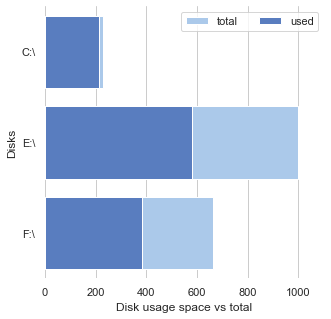

In [313]:
#Построим график, на котором видно соотношение свободного пространства к занятому
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Load the example car crash dataset
sort_space = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="disks", data=space_df,
            label="total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="used", y="disks", data=space_df,
            label="used", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1100), ylabel="Disks",
       xlabel="Disk usage space vs total")
sns.despine(left=True, bottom=True)

([<matplotlib.patches.Wedge at 0x261d19f77b8>,
 [Text(-0.07811861447430153, 1.0972226219289392, ''),
  Text(0.07811861447430139, -1.0972226219289392, '')])

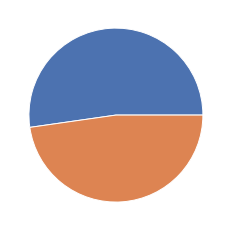

In [81]:
from matplotlib.pyplot import pie

pie([space_df['total'][0], space_df['used'][0]])

([<matplotlib.patches.Wedge at 0x261d1f7ca20>,
 [Text(-0.443548923158026, 1.0066103281634635, ''),
  Text(0.4435489231580259, -1.0066103281634635, '')])

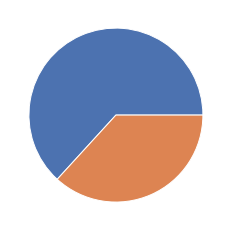

In [83]:
pie([space_df['total'][1], space_df['used'][1]])

([<matplotlib.patches.Wedge at 0x261d2092710>,
 [Text(-0.4440911482980337, 1.0063712297176097, ''),
  Text(0.4440912425213062, -1.0063711881387913, '')])

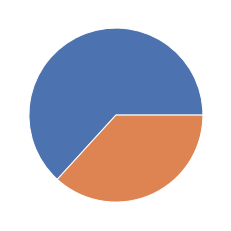

In [84]:
pie([space_df['total'][2], space_df['used'][2]])

In [22]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\serg\anaconda3\lib\site-packages (0.11.0)


In [315]:
sns.__version__

'0.11.0'

In [198]:
a = []
for i in disks:
    a.append(formatSize(shutil.disk_usage(i)))

In [11]:
import os
import stat
from datetime import datetime, date

def print_dirs_recursively(root_dir):
    os.chmod(root_dir, stat.S_IWRITE)
    root_dir = os.path.abspath(root_dir)
    print(root_dir)

    for item in os.listdir(root_dir):
        item_full_path = os.path.join(root_dir, item)
        if os.path.isdir(item_full_path):
            print_dirs_recursively(item_full_path)

In [135]:
#print_dirs_recursively(disks[0])

In [136]:
dir_path='C:\\Users\\Serg\\Documents'
fill = []

In [137]:
import pathlib
for filepath in pathlib.Path(dir_path).glob('**/*'):
    fill.append(filepath.absolute())

In [139]:
import pathlib
file_name_list, get_file_size, file_names = [], [], []
file_ext, getCTime, getMTime = [], [], []
for filepath in pathlib.Path(dir_path).glob('**/*'):
    #print(os.path.isfile(os.path.basename(filepath)))
    if os.path.isfile(filepath.absolute()):
        #get file name
        file_names.append(os.path.basename(filepath))
        
        #get filepath
        test_list.append(os.path.abspath(filepath.absolute()))
        
        #get file size
        get_file_size.append(os.path.getsize(filepath.absolute()))
        
        #get file extension
        _, file_extension = os.path.splitext(filepath.absolute())
        file_ext.append(file_extension)  
        
        getCTime.append(os.path.getctime(filepath)) #Get creation time
        getMTime.append(os.path.getmtime(filepath)) # Get modified time
        

In [156]:
# get_file_size - результат в байтах
#  Переведем для простоты в Мегабайты (Mb)
file_sizes = [round(((x / 1024)/1024), 2) for x in get_file_size]

In [157]:
#Создаем список кортежей, для нашего будущего датафрейма
data_tuples = list(zip(test_list, file_names, file_ext, getCTime, getMTime, file_sizes))

# Check List

* ~конечно лучше, для простоты выдернуть названия файлов. выдернул~
* ~Выдернуть расширения, будет интересно посмотреть сколько каких файлов создается~
* ~необходимо добавить время создания файла~
* ~время его последней модификаций~

* hash файла? проверить копию файла и основной файл на совпадение хешей, можно будет поискать дубли
* обернуть всё в функций, возможно в классы(?) для удобства и загрузки в крон.

* Копирование и сжатие файлов
* построение дашборда (?)

In [158]:
#Сконверуем в датафрейм
df = pd.DataFrame(data_tuples, columns=['FullPath', 'FileName',
                                              'FileExt', 'Creation time', 'Modified time', 'Size', ])

#взглянем на наш датафрейм, с ним будем работать постепенно добавляя данные
#время в unixtime
df.head()

FullPath        FileName  FileExt  \
0      C:\Users\Serg\Documents\123.pcapng      123.pcapng  .pcapng   
1     C:\Users\Serg\Documents\desktop.ini     desktop.ini     .ini   
2    C:\Users\Serg\Documents\hotspot2.zip    hotspot2.zip     .zip   
3        C:\Users\Serg\Documents\test.jpg        test.jpg     .jpg   
4  C:\Users\Serg\Documents\Untitled.ipynb  Untitled.ipynb   .ipynb   

   Creation time  Modified time    Size  
0   1.556492e+09   1.556492e+09  202.18  
1   1.553546e+09   1.599918e+09    0.00  
2   1.558729e+09   1.558729e+09    0.07  
3   1.599601e+09   1.599601e+09    0.05  
4   1.570129e+09   1.570129e+09    0.00

In [314]:
df.FileExt.value_counts()[:20]

.py           1778
.pyc          1699
               686
.jpg           174
.загружено      70
.pyd            59
.css            39
.txt            39
.png            32
.csv            29
.h              27
.npy            24
.exe            24
.xml            22
.vmdk           17
.f90            15
.trec           13
.gz             13
.pkl            12
.js             11
Name: FileExt, dtype: int64

In [302]:
df[df.FileExt == '.загружено']

FullPath  \
4635  C:\Users\Serg\Documents\ыыыы\Новости_files\028...   
4638  C:\Users\Serg\Documents\ыыыы\Новости_files\37d...   
4646  C:\Users\Serg\Documents\ыыыы\Новости_files\479...   
4648  C:\Users\Serg\Documents\ыыыы\Новости_files\4ad...   
4652  C:\Users\Serg\Documents\ыыыы\Новости_files\61d...   
...                                                 ...   
4893  C:\Users\Serg\Documents\ыыыы\Новости_files\vid...   
4896  C:\Users\Serg\Documents\ыыыы\Новости_files\voi...   
4899  C:\Users\Serg\Documents\ыыыы\Новости_files\wat...   
4902  C:\Users\Serg\Documents\ыыыы\Новости_files\wid...   
4906  C:\Users\Serg\Documents\ыыыы\Новости_files\www...   

                                               FileName     FileExt  \
4635  028bfab8c6a4c40a39372d9a5126be84.aecded3a49e6c...  .загружено   
4638  37d6fe1fee6fb6accf5867cbca2cda9c.784f9f81af390...  .загружено   
4646                  47935798a9fc8df8781f.js.загружено  .загружено   
4648  4ad6740d9b54e18c214b1584b85679ea.f9996a8f7ac73...  .загружено   
4652  61d8b4ea43bdae5d02a3f103ba5a6da4.3e8b0df3175d4...  .загружено   
...                                                 ...         ...   
4893    video_youtube.102f54c27b29a235da47.js.загружено  .загружено   
4896  voice_message_player.92746c027127b09badcf.js.з...  .загружено   
4899                                 watch.js.загружено  .загружено   
4902                               wide_dd.js.загружено  .загружено   
4906                         www-widgetapi.js.загружено  .загружено   

      Creation time  Modified time  Size Creation time formatted  \
4635   1.584063e+09   1.584063e+09  0.02     2020-03-13 01:29:12   
4638   1.584063e+09   1.584063e+09  0.18     2020-03-13 01:29:09   
4646   1.584063e+09   1.584063e+09  0.01     2020-03-13 01:29:18   
4648   1.584063e+09   1.584063e+09  0.10     2020-03-13 01:29:10   
4652   1.584063e+09   1.584063e+09  0.02     2020-03-13 01:29:08   
...             ...            ...   ...                     ...   
4893   1.584063e+09   1.584063e+09  0.02     2020-03-13 01:29:21   
4896   1.584063e+09   1.584063e+09  0.02     2020-03-13 01:29:11   
4899   1.584063e+09   1.584063e+09  0.13     2020-03-13 01:29:18   
4902   1.584063e+09   1.584063e+09  0.01     2020-03-13 01:29:11   
4906   1.584063e+09   1.584063e+09  0.03     2020-03-13 01:29:05   

     Modified time formatted       Dates Creation Date Creation Time  \
4635     2020-03-13 01:29:12  2020-03-13    2020-03-13      01:29:12   
4638     2020-03-13 01:29:09  2020-03-13    2020-03-13      01:29:09   
4646     2020-03-13 01:29:18  2020-03-13    2020-03-13      01:29:18   
4648     2020-03-13 01:29:10  2020-03-13    2020-03-13      01:29:10   
4652     2020-03-13 01:29:08  2020-03-13    2020-03-13      01:29:08   
...                      ...         ...           ...           ...   
4893     2020-03-13 01:29:21  2020-03-13    2020-03-13      01:29:21   
4896     2020-03-13 01:29:11  2020-03-13    2020-03-13      01:29:11   
4899     2020-03-13 01:29:18  2020-03-13    2020-03-13      01:29:18   
4902     2020-03-13 01:29:11  2020-03-13    2020-03-13      01:29:11   
4906     2020-03-13 01:29:05  2020-03-13    2020-03-13      01:29:05   

     Modified Date Modified Time  
4635    2020-03-13      01:29:12  
4638    2020-03-13      01:29:09  
4646    2020-03-13      01:29:18  
4648    2020-03-13      01:29:10  
4652    2020-03-13      01:29:08  
...            ...           ...  
4893    2020-03-13      01:29:21  
4896    2020-03-13      01:29:11  
4899    2020-03-13      01:29:18  
4902    2020-03-13      01:29:11  
4906    2020-03-13      01:29:05  

[70 rows x 13 columns]

In [250]:
def unixtimecovert(unixtime):
    return datetime.utcfromtimestamp(unixtime).strftime('%Y-%m-%d %H:%M:%S')


df['Creation time formatted'] = df['Creation time'].apply(unixtimecovert)
df['Modified time formatted'] = df['Creation time'].apply(unixtimecovert)


#df['Time'],df['Date']= df['Creation time'].apply(lambda x:x.time()),
#df['Creation time'].apply(lambda x:x.date())

#Разделим полученное столбец на столбец даты создания файла и времени создания файла
#подобное разделение позволит посмотреть на дни и время когда больше всего создается файлов
df['Creation Date'] = pd.to_datetime(df['Creation time formatted'], format='%Y-%m-%d').dt.date
df['Creation Time'] = pd.to_datetime(df['Creation time formatted'], format='%Y-%m-%d').dt.time

#Подобное преобразование проделаем с датоой изменения файла, чтобы лучше видеть
df['Modified Date'] = pd.to_datetime(df['Modified time formatted'], format='%Y-%m-%d').dt.date
df['Modified Time'] = pd.to_datetime(df['Modified time formatted'], format='%Y-%m-%d').dt.time

In [202]:
print(df['Dates'].min().strftime("%m/%d/%Y"))

In [306]:
#Сгруппируем файлы по дням создания
df['Dates'].value_counts()

2020-03-26    4425
2020-03-13     293
2019-05-24      32
2020-08-10      20
2020-07-23      19
              ... 
2019-06-05       1
2020-03-17       1
2020-09-07       1
2020-06-08       1
2020-06-13       1
Name: Dates, Length: 62, dtype: int64

In [316]:
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

In [320]:
df['hash'] = df['FullPath'].apply(md5)

In [388]:
(df['hash'].value_counts() > 2).value_counts()

False    4498
True     45  
Name: hash, dtype: int64

In [443]:
#считаем уникальные значения тех хешей, которые повторяются больше одного раза
pd.unique(pd.Series([i for j in tested.values for i in tested.index if j == True]))

array(['d41d8cd98f00b204e9800998ecf8427e',
       '985ffd911e31460a0fd16cc807e754cc',
       'ea7e528e528955259af3e65d86ba8e49', ...,
       '91882cd6bd35050057fb46c78c0cf251',
       '1d4af19aa29c321ab03dfda4b5fd282d',
       'b66a708e81e188b174ca70eff9191c6e'], dtype=object)

In [440]:

for i in tested.index:
    for j in tested.values:
        if j == True:
            print(i)

d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f00b204e9800998ecf8427e
d41d8cd98f

9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343f5af4d96a12ba74cd79e79
9364205343

6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
6b5ab25d6c67149b565e4b62ea6d07bd
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24bbd0cfad59a06f8e813e13
049a2b9b24

f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4c7ed21940f57b3172a4021
f21a138cc4

0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1ff7e7dfbca60f757dcd2eec
0526015a1f

a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe64f1d2f9e06725da40dd75
a803911bfe

228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
228a480128ab680c74ce63a5e9473c4c
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70ac3aa7a364c17735f23c5a
3bd3073d70

d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a76b60f11d013820fea7ffdd
d44e2874a7

32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d04fd041aa06adfb7a96736c
32ff2527d0

c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b824159e32366a75259b8d038
c2d6169b82

fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd276fa09fc2152c1ebc35c39
fcdbaecfd2

5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc231acbe1a8cd64d4f68cc8
5c6b9233cc

8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
8a98d4a9aa9609f03a157fb98e64d74e
547e0bd9cba010559f0524233f4574e7
547e0bd9cba010559f0524233f4574e7
547e0bd9cba010559f0524233f4574e7
547e0bd9cba010559f0524233f4574e7
547e0bd9cba010559f0524233f4574e7
547e0bd9cba010559f0524233f4574e7
547e0bd9cba010559f0524233f4574e7
547e0bd9cba010559f0524233f4574e7
547e0bd9cba010559f0524233f4574e7
547e0bd9cb

a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8de80b7dede3f6507625d7a7
a593351c8d

2b8cf462bb798769e5444e7c70e69a34
2b8cf462bb798769e5444e7c70e69a34
2b8cf462bb798769e5444e7c70e69a34
2b8cf462bb798769e5444e7c70e69a34
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe655141f5e4e5901a11fd31d
78e791cbe6

a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8b93311b1912e30275de16d
a6d2b7f3f8

55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388c696302e83b1f82e85be1a
55441af388

e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5cda31d434f10b7299b4b47e
e9b4eabd5c

178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fcfadf6bbe06b4ed8ecff7e3
178d3813fc

daa12a227aaf84566be3dbf77d46d3a1
daa12a227aaf84566be3dbf77d46d3a1
daa12a227aaf84566be3dbf77d46d3a1
daa12a227aaf84566be3dbf77d46d3a1
daa12a227aaf84566be3dbf77d46d3a1
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e0429279d3da8ce84e3cd4673eac
8788e04292

e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017fb3ff83c5cf91c359597387
e5e38d017f

3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c2b7f82b2ec8a31439e6ba0
3b39e72f7c

1910009f608d9185aac1a5c2dec19679
1910009f608d9185aac1a5c2dec19679
1910009f608d9185aac1a5c2dec19679
1910009f608d9185aac1a5c2dec19679
1910009f608d9185aac1a5c2dec19679
1910009f608d9185aac1a5c2dec19679
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa6ed7b350b30bdf5ead89f1
e13ec841aa

6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
6867f7efdade5359a9592a78c718e3e3
3e4b7a12f6

3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e9abcb596337238a4d52ecd
3b0672cc7e

3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb606111d9753760d48cb8be7e7f
3770cb6061

a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
a56cfa0fb4ad4b0cf1919b9c665f4d63
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5cac78089a6dfb56a3eb822f
c5d5216f5c

6a49b15cd7e4c4670ab1a45c13911a8d
6a49b15cd7e4c4670ab1a45c13911a8d
6a49b15cd7e4c4670ab1a45c13911a8d
6a49b15cd7e4c4670ab1a45c13911a8d
6a49b15cd7e4c4670ab1a45c13911a8d
6a49b15cd7e4c4670ab1a45c13911a8d
6a49b15cd7e4c4670ab1a45c13911a8d
6a49b15cd7e4c4670ab1a45c13911a8d
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8a0728e32233b9850e99d02
e08d2a4da8

234643f27ecab1983ccca0e6c246b9bd
234643f27ecab1983ccca0e6c246b9bd
234643f27ecab1983ccca0e6c246b9bd
234643f27ecab1983ccca0e6c246b9bd
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b303ffb5add888c62b6c7bee
97b36495b3

e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef488f8090f2ae84c9b57b7d83
e6dc35ef48

6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7ce09aeb565455a2b463e8c3
6399bbcd7c

9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7541f4fa8a9e694726382cf
9b0daf03d7

650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb27edf976838332c2fd6c69f
650d8e8eb2

24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2bdc9182cf9a0b8c6918cdc9
24236b6e2b

b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68c59d6e9bfa252432bce2e6
b944e38c68

1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc967c27186f6f72c3f25697c2
1c6f3fbc96

af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af249124644668754158905c58d75443
af24912464

1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7163c0b369ef87ab439b6af
1fa5d764f7

f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
f52ace3ca8000ac25413d25be414349d
a0a117012e1f7a53c9de4875c0b80a58
a0a117012e1f7a53c9de4875c0b80a58
a0a117012e1f7a53c9de4875c0b80a58
a0a117012e1f7a53c9de4875c0b80a58
a0a117012e

91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
91575e2f70727811b0b953fdeab61af7
d5a55760f489b5613c0029668b6a9ac3
d5a55760f489b5613c0029668b6a9ac3
d5a55760f489b5613c0029668b6a9ac3
d5a55760f489b5613c0029668b6a9ac3
d5a55760f489b5613c0029668b6a9ac3
d5a55760f489b5613c0029668b6a9ac3
d5a55760f489b5613c0029668b6a9ac3
d5a55760f489b5613c0029668b6a9ac3
d5a55760f4

095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509766e46a47881de76c89585
095b5c8509

41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262d5d0e03e602af56a193f11
41c402c262

8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aafeda153d057343c3bd1a660
8568bc6aaf

60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d63581d5e247cdd8bf71004ad0
60a9d3d635

b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a9b289c981af0cdbf80f7e1
b71f8c6f5a

2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73bfb90947df691d2e32a668
2857f05e73

becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44aea67816b4ce8e12e85670c
becdb5c44a

3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bdf2810b64c54fe475265d6c
3532c608bd

bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bf1e92228c1b9a02ee6fb8af5c040712
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c7185333beab31f2d8722a2876eb
bcd1c71853

eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505efc372a2cda508c75804a08
eccbd5505e

ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b6e01c96423e5b6a5d75fbb
ca12416f7b

2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f34216cbd4000759d309ecc432
2a52f5f342

6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935ae78e17bc97328e0c445acb
6cdc5b935a

04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
04d31efc67ae573521864c628c4f42ec
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78ec65445e9917b04c562c29
8b0446ec78

629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d6bb7f549659880f58bb983
629bc7cb5d

66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715bbe81dc3776778ebc7187a
66d71c1715

dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
dbc4dee96b5f8687bdd13c5aa281abd1
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe04380a8c738f9f0a412e88e8a4
e4cafe0438

a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a65b5511ec9aeaa84c109a9e81532a95
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7644dfe771fc232f707405b
a24223edc7

320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f889f12ece1d61f649ba1ed
320d19211f

0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
0bc03820c2543f6a7c7c60901db1d262
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04ea6f6181b0fc36c23fd6c9
da02a95d04

aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f3309627cd17431fa9b311953123
aa74f33096

3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fdc775241ef380b2844925cc
3727d500fd

c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa254f60ee56585858c8513a4d
c21a72aa25

aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
aa77f2149c3c0958651138d61283f79f
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c44c5e8d42407aa446e906e8
b1999d98c4

9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772dc0ee17953bc999f0103e4
9fb48ca772

4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb925857342fbdfa1412433e230a1
4d1eb92585

9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da019327bb2c3291e9de3daf
9ddf4180da

87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a123bfa9acc38ae902f37980
87cf3460a1

fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9882410ede29e647d69dd8c
fa508f87d9

76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2e24847f531c38079dff464
76260d21a2

ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e17180ed7467f5b74aaeb02e
ad861184e1

0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
0252a5be9b24c6e4ad32763454085151
aacaa08a3d3b24e4f4d3c1c871598de6
aacaa08a3d3b24e4f4d3c1c871598de6
aacaa08a3d3b24e4f4d3c1c871598de6
aacaa08a3d

e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78bf23dec4fad929a1faa0d9b
e87c76c78b

fee9922172e4e00c5678daa7f40357d2
fee9922172e4e00c5678daa7f40357d2
fee9922172e4e00c5678daa7f40357d2
fee9922172e4e00c5678daa7f40357d2
fee9922172e4e00c5678daa7f40357d2
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27da03ed423f9b41b31f6687
8862772d27

95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98dbe8a5b733c3517897bd1c2
95c47de98d

d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4fffabb57123e83f3bcda23
d21dd320e4

4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e3d63b413e70ac7ead2247e
4e745f673e

7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b196352ba66fd3986c1840c9
7b5c05b8b1

6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
6327c89ab95dbbed12604f98873d81c8
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9091fed385e86c1cea5b773
be9e4f63e9

6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
6bcca99889975bd5086e2efed05e359b
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a5386300090a0875ebca6f441
95c5b24a53

5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb5c39f4a0f758765d224a88
5df78018bb

138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49c5262c662a2acbfb70cda6
138ca20c49

349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db11be91bc214bdc3993dcc8
349a0b74db

70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669e767ed9d0cedf3f89bae45
70d2fb4669

506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
506b85de6779b20879937f892a55efb7
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89e5619f908270ea856fd3f6
14d3883e89

0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd594e51704f27836dae8829
0f802e02bd

ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92147f1cc44ce39af79a11c4
ef2fec9b92

9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de322f1eeb4179afe8be2650
9d9a3140de

068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e2ae1801f2aa554449481d8
068b1ef99e

8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f602c4221e69b5668990bbc74
8b49ea0f60

d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca425288066df07d58be7711eb
d55bcbca42

c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a910470183f8c1d26ffad2ffb
c08a591a91

abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca2fdf4fd65857dff6e609d9
abc026baca

89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dcbd5688b76a12d942f3e6c2
89466f76dc

eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac44572921cd0860030acbb26afb4f8
eac4457292

313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25db787bc6b28dd77f3096e9d
313bfce25d

2f97eb994feba3092418f791c8618c3b
2f97eb994feba3092418f791c8618c3b
2f97eb994feba3092418f791c8618c3b
2f97eb994feba3092418f791c8618c3b
2f97eb994feba3092418f791c8618c3b
2f97eb994feba3092418f791c8618c3b
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f75d0e1860ddc1e47871b521
11445b12f7

26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c63093fbe9ebd78aadab89b
26a4ef759c

f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132ce61efb1cf8f38524ec22f7
f871c7132c

1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6ccccf76772281dcb6f6ff5add6
1c0df6cccc

a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e6a73b1cb18fad8f0f92a5b
a44b46c41e

14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f6babf6932e22c2b66f2765
14a6cad06f

aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59dbd0d8f62e74cc73e958c2c3
aebfcf59db

671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b33979d709b719dd2c0dd98
671757298b

5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c047ec8dd2454fa20689307e2
5437dd4c04

7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d9fbec33fa5c4dda12cae31
7ef25d9b9d

58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301adac7e981e11030a249b311
58cb2d301a

b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd6f01140398499769424d9b
b71c60aafd

1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e84bd151c8dcbea7ce341d5
1b5a7aaa3e

9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd22249df2bb0e29cabcdbe87835
9206fd2224

2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4aca73e681a87105becf7b66d
2d982fd4ac

21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a37b20e9cc9e3697f96dd75
21ec42056a

04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8c352acc53668680b2accd6
04532719b8

a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
a09e13ee94d51c524b7e2a728c7d4039
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d4daa8247b304575308f1af
ee159d2c4d

d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc71723c9f7be1fe9fc57aaced8a
d135bc7172

1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2a2499778366858af9a5308
1518ac6ff2

5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
5735701b0f71c55cc4390efd805d0849
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff16590d2c56dabbd012ed5a6f5a
8ec9ff1659

eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab47326fb40f80a0dbbb9f856
eb742e3ab4

afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93e7100ffe41ed70c757ff37
afdd720f93

eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2bdd08d1f61793c3570ce5f
eda60645b2

ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504eb318ea29e606cdb066cc71
ca5502504e

213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
213bd6678f1840204736dc90b7ad2ee1
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b45ecf794935b1fd1919a2c7
f576e857b4

fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bdcada99f233d9b763bf8131
fc025bf1bd

e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13cea97e384ee158f476c6d534
e5abaa13ce

0bf951f3592242ff71f77420b2207356
0bf951f3592242ff71f77420b2207356
0bf951f3592242ff71f77420b2207356
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77dd54add81ea81b3869114c
20aeaeeb77

e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1e93561c917d434f2cd9d99
e8d949a3b1

28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
28c984d5b0f0d0e1c9211c971768851b
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b2d3688daca7dfe6327cb9e
70bb0e0b0b

0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89558eb6cf5eff6be243e055
0f4ea77b89

069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23d624e00548dd0c4f06a555
069e22ab23

05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
05b5f43b82615231b3b6d85924f1133d
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8d0ba8168b2b13a4a8cf414
531fe7c1a8

021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec01d72ad5feb1c4a9e5638a0
021e226ec0

b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb8e0440f0b62ea570a12343
b7a0f1aacb

f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a04b6fe06f243ee48d6d0d50
f4f13fa7a0

ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada4bc5674aa833d494cdae84
ced6639ada

d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
d5b3f08b1b14440627120d6de66edcf1
19794a2f9f6a7f391b1dda291d00d88e
19794a2f9f6a7f391b1dda291d00d88e
19794a2f9f6a7f391b1dda291d00d88e
19794a2f9f6a7f391b1dda291d00d88e
19794a2f9f6a7f391b1dda291d00d88e
19794a2f9f

035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96232685a7fb0061d6d8a16a
035eb05b96

3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
3559250dc04e2b60dbda3561b1bdaea8
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff7bf90b26f09f7769c76d1f
770a25b6ff

087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee1869b57050854932a65308c3
087f6eee18

60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77aed4cc9d4fcf3f362a57e507
60130c77ae

56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc9b18c527958f0217968415
56c3238cfc

f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd62bcf8211db7b0e46e4657
f71ed8c9fd

788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e97fb98f4d379b74ce0352f9
788033a0e9

8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c69604e55e026a736f7ec00e57
8c1cc5c696

5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0e273a69bca84670fe05e13
5ca182c7a0

fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84cb1a83422b57af456149516
fe85d0a84c

95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
95ef7f58d67a3c8f3c5c1265ef56ff20
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49c8702b8ecd5f004e831653
cb4f9dda49

2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a8914aae849f0d105b4316c89
2e8a955a89

ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb1a6b0e868c79d6e88deccf
ca29df0dfb

5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fffdd0c008e22f858b699f930
5c454a8fff

153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f0ed6145666a3e9b5693007
153f1a599f

2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a462c1768f58a61f4b429fe52
2f71368a46

9638bce7ea914bf13296b96158044d97
9638bce7ea914bf13296b96158044d97
9638bce7ea914bf13296b96158044d97
9638bce7ea914bf13296b96158044d97
9638bce7ea914bf13296b96158044d97
9638bce7ea914bf13296b96158044d97
9638bce7ea914bf13296b96158044d97
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0b646e3c7ea1c4db16fa8c1
4f61660be0

22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2d0f776ea49f7b3d47cac41
22212747f2

d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4842fd133f315095868c921
d205387bf4

1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b38747c5c1ea40f2779a64c
1a23fd311b

5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231ac0c2f86eaad45771197fa2
5a8206231a

812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b06d90fb6c7a731d9724cd8
812a99f20b

80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4ada3b67dcdf6030f02d647
80fc094fb4

85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be830118d74a323e1326da50d
85a4289be8

6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8be474bcf9e489223fdf50d0
6c6ccfcf8b

c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b21796337a93232fbb418c041c92e8
c6b2179633

6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
6fc3d180df3514e0c2d37bd7c7b16249
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd96cfd79949f3b2cc71bbd46
0ea9615dd9

42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b864eadc02b3868591f21de
42d4bacb5b

b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc44ee85500b80184565a685c
b6f5e1fbc4

fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
fcc1790559e135bd3f83165546240fb2
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836feb712cef3da213af1220a3d
92a4d836fe

6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430a7cd6d2c7135e57651240a
6b75d9a430

8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a4502f8bdcfc8fa45934505
8d04df620a

a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a779c6518baba11be5adb9311
a0f2890a77

600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722fa5c61e3a30ae2f69bbb60
600cf13722

f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367dbdc8d3b0f2b0be56544da4
f858e0367d

80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
80655b851789b3d2df680cf7c1dd4db1
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014efd2c30cf19c3d7e68cf0036
923e5014ef

5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b798631624550a790ebc9ce4ab715e2
5b79863162

c153f5648bbc7d1259155d2e9a39d6db
c153f5648bbc7d1259155d2e9a39d6db
c153f5648bbc7d1259155d2e9a39d6db
c153f5648bbc7d1259155d2e9a39d6db
c153f5648bbc7d1259155d2e9a39d6db
c153f5648bbc7d1259155d2e9a39d6db
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe38305b7c3dfeb4ae6787c02d8
8a4bbfe383

006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef477b7f69345c75b66fb58c8
006aeabef4

2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b190f9f2778b2fe3deeacba14
2f157b4b19

e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa36455e88168a36121c7c8b
e3053ce2fa

9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a9ea415d78c7d2d4d080d01
9de045d60a

4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cba7bc42583fec584188421b
4c7b5090cb

7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881582207b4a282e3f082de6d
7fbcea1881

aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
aa5ba9f87fe827285a21d39ba6d4c7e1
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245e1dbac68b3d48ddb5254c7
d5f0310245

306ce29ffedacce7cfda236b7c8fed61
306ce29ffedacce7cfda236b7c8fed61
306ce29ffedacce7cfda236b7c8fed61
306ce29ffedacce7cfda236b7c8fed61
306ce29ffedacce7cfda236b7c8fed61
306ce29ffedacce7cfda236b7c8fed61
306ce29ffedacce7cfda236b7c8fed61
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff477c2ba09f18416ea5bab0
6b47c2f2ff

1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b72140b7db3eca216bccb82
1bbd356f2b

5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae5f5cd59cd80f272a55757c
5e7db054ae

0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe0488b5752e9129d3610081
0ddcef0efe

27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90b0a862044384e1d06131fa
27dca3aa90

425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5a0aa032ab82140e1533d8d
425673fdf5

8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
8322de80367fd288e61ae3c1d2c21a83
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd2695933ea9933519626bb66f5
58c50cd269

ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e88e79d4f299ed3a7bb8a3d
ee74145b3e

3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8612d3619563cf48f14128a
3016d50cc8

e66db9b08fa464941bcc1a83fd0cc7fb
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984572a6e1f177c55abc2233d
4acb3ae984

068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75eb34c6594742a6524e9489
068e044c75

cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804d8b95b17c91b4d5750af4f
cf31262804

4a63e90001836ee17a6f24cb137a817e
4a63e90001836ee17a6f24cb137a817e
4a63e90001836ee17a6f24cb137a817e
4a63e90001836ee17a6f24cb137a817e
4a63e90001836ee17a6f24cb137a817e
4a63e90001836ee17a6f24cb137a817e
4a63e90001836ee17a6f24cb137a817e
4a63e90001836ee17a6f24cb137a817e
4a63e90001836ee17a6f24cb137a817e
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414f3b9c47a9b826bb71a0337
e6b3169414

50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956c05ce691a517a6b42ec133
50186d4956

3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56ff0e69859e5ab60c1f9f3e9
3a5307c56f

2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f05874a3e3958b98a5c286dd811
2a2f8f0587

6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeba50118690623e424d932d9
6a16cf8aeb

ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6c9d0f83aabd60647fd599c
ecb83e3eb6

0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
0494843d34a5dc68970ae4899895fd6e
8406eae21c6993091dd5d6e291e6795e
8406eae21c6993091dd5d6e291e6795e
8406eae21c6993091dd5d6e291e6795e
8406eae21c6993091dd5d6e291e6795e
8406eae21c6993091dd5d6e291e6795e
8406eae21c6993091dd5d6e291e6795e
8406eae21c6993091dd5d6e291e6795e
8406eae21c6993091dd5d6e291e6795e
8406eae21c6993091dd5d6e291e6795e
8406eae21c

e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c77ea9f80c60c29a246af052
e30ee9e9c7

9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc71abfb4f7c3bc4ea780b0ff
9f8abfbdc7

83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
83405342027437e3a569183d57c2c6a2
8340534202

d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
d49136433bab6df15dd5321d7ed7e740
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f36877577c1ea21ef08c2d52e3
865e08f368

7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a50a53bf59512c8d0cd179d
7d0ccaae0a

00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d7596a227ab6193a731580c3d7
00c3c9d759

bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
bd67e3103047d6ee6618158a1c405940
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f9548fca78e1e6c9725c616
911bc2be0f

1a4ec5ad7ef694240cc55c85eb4d6abb
1a4ec5ad7ef694240cc55c85eb4d6abb
1a4ec5ad7ef694240cc55c85eb4d6abb
1a4ec5ad7ef694240cc55c85eb4d6abb
1a4ec5ad7ef694240cc55c85eb4d6abb
1a4ec5ad7ef694240cc55c85eb4d6abb
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a77f30c2987a21e307f5c01a
a07f8066a7

089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
089f2eb1cb61bfc069c08c62046e2bec
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db292510f67b048a298c6651a
8b8b4d4db2

7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27eb662aa5421335ecca2e59
7ed687bd27

710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e6d9c2684b91031fcf8ce09
710720b14e

293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91201d2e74bafc7f6093878d
293bcd4c91

9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeffb62234e3f11c4e21d8f2c3
9b7a7efeff

df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648ee01aee0b1bafb12d7de817
df35db648e

73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0808f4694e6a90d910932bf
73a9b13fb0

1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4025fe6a1118a4608b16869
1a6cc2f2d4

0ceea5f79ee4ff2c4f35b2dd75661a20
0ceea5f79ee4ff2c4f35b2dd75661a20
0ceea5f79ee4ff2c4f35b2dd75661a20
0ceea5f79ee4ff2c4f35b2dd75661a20
0ceea5f79ee4ff2c4f35b2dd75661a20
0ceea5f79ee4ff2c4f35b2dd75661a20
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4696c8a7314cd32ba7ba822
a4e24e07f4

507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f664b89eb0ddad2ab54da47
507b5d6f3f

b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc896af00c4438f87da58c3d54
b5e204bc89

7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d4c2d74f6c252e5f47c6e10
7d3ccbd56d

70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900e6d3f0f7a3a09978024820
70895db900

327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a289a3cbc31e88e747e337fd0
327e880a28

492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12efc87cc8ce9ef9b46126b4a
492322a12e

cfcd37ee9144505b7fed9e5118324766
cfcd37ee9144505b7fed9e5118324766
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b3735b969cd2711909ecfdc79
4555cb6b37

80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c328039d7fe39ed738c0cb9
80c99db67c

5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0fe914f59b5ef92d972494de
5064ea7b0f

8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6ec439e371f6b2d634654bc
8d0518e6c6

37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
37586867833f472dc93e78855625ae5b
3758686783

4a094c3718a094be5ae6304889ebeef3
4a094c3718a094be5ae6304889ebeef3
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da7210f89a32d2b8b3559665
922a0210da

212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd1298186ee0a429201be463659e6
212fd12981

5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34707110d381c40d69fee38a
5d90f52b34

ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
ee8c91a044278dbddd3181aaa71b6896
e7a3581ef17a72c5feaae2b6a44225db
e7a3581ef17a72c5feaae2b6a44225db
e7a3581ef17a72c5feaae2b6a44225db
e7a3581ef1

6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25eaa4eb282dacbb68718ddcbc
6abafe25ea

ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079508a41beb134568b4b3028
ce2410f079

9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d3251e5b81cd98da7019b10a91
9f4399d325

5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1f82577cc67fd56085bd7ad
5ce5f74cd1

1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
1aa81c684c2969dfad106be90ca801e2
4e314fea1a3e5abb4203a27159eca1b3
4e314fea1a3e5abb4203a27159eca1b3
4e314fea1a3e5abb4203a27159eca1b3
4e314fea1a3e5abb4203a27159eca1b3
4e314fea1a

e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9c37614949d410e9990ff9d
e545a35bc9

92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
92063bbf34f234e64f7a92887d66ace3
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0b648d008aebd506b689d4f
d19c2107b0

f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba3858fbfc64e7a82af90f498cf
f9ba7ba385

150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
150bbd205f0a7808bd01187892f8f296
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
207645017904cfe6f660912d7e3a4c2d
2076450179

5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10ac126250ba6a405949475ad
5d98f9f10a

a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8f49fe45836e245e97ddbe9
a28ab259c8

c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb4e021b744905845d3f438e
c9ec5b0deb

505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174e5d73af8bf57f3a119b3d6
505bcfd174

2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000a67e0b753ed8dcef24939f
2a7c141000

80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6bc6bef0fe025c26fa8cd81
80af9ac2d6

e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72b063cf3201f55fb0e60681
e9e7b1da72

a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce405d63a24d78f4f5a64ff2
a3b4c674ce

b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe3a081cd204cffc6ce34326
b0441681fe

41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d17c32d4e80478105679d630
41627800d1

cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c12a919103ca51b486724b9
cbf29d615c

e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
e17439865b7ae37ce62c9d0c634c9bbe
2dfa88ba79c9032056b98e74b64c7194
2dfa88ba79

679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a19033376cc29e1ab5557fe2321f5
679a190333

dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
dd6097a9bea22639f04459de3eef55b7
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291ac78d5f23e0d20abbf0665
72ad68e291

d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc93ffa3215b94083bc78cb3e
d8e7df0bc9

015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2addefb477233320b399879d8ff
015ec2adde

b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a157826509b9ad0b8f7f1b565839
b594a15782

2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25bfacde97cc0b30c34f5c2bd
2fc5b4d25b

2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295caf9d0c6615349c2a0734a7
2cf308295c

828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f202e3acd99189f8a022455
828c5ab93f

02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a2ac5e4ec2cea04afaaf925
02f615b35a

06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e802c50c12ecb0b1e250123
06e156ca8e

c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61afbf707e0d86b889ab740a0d
c78e6f61af

7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d60da22ed8372848ff01179b
7d26e8a6d6

3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fee046aa07d4341b2f8b58a0
3b3499c0fe

dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3321d5720201693a84665fa
dab212f4d3

5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ecfac98cc3bde7e0e991a26b
5ff587f3ec

c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf18256cc290872b05ffa14a5
c05fe82bf1

3c72527127a83f8c7d3934461070fe7c
3c72527127a83f8c7d3934461070fe7c
3c72527127a83f8c7d3934461070fe7c
3c72527127a83f8c7d3934461070fe7c
3c72527127a83f8c7d3934461070fe7c
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643ee1febe545c3ed7e1ba231
b383eff643

ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c7af6a31982e26609b1a8f3
ace80dd96c

68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099ac4d615f38a46b39cb3d96
68d49df099

81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f7290abca48cd39f4469ab1bb4
81d303f729

8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae8c25052e030658a4e43b0b
8093c358ae

074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d58053ff24dc36f9584fa33
074e3c705d

ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d541b296a977096e0e803535c
ce77829d54

fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ffef85ab97f361fa8b261e05
fb359c44ff

b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c14601b15e44a86db2616a46
b5454042c1

aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c3a42a785551e90662a5143
aa1422256c

9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08774c6269e9e8fcb20b5066
9eb1d8bc08

ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda67630f1026695d7bcd1e4c92eb
ee7dda6763

1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
1d849d64aaab7b810a15fd66ad2af907
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca90ddf9ecd4da92afaa1c6e
d8349c63ca

389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707e1353f33608c214da8bfdc
389c874707

7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e5031eaf69e6d1e5583ab2e870
7db6c3e503

95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f47f620303157dda724ac4e
95daa0d06f

7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bcee2a0d7ded00fcca2851a91
7f615a0bce

9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaaeac59e12ff982fd98fe858
9d99d9bfaa

bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d1782dd5103c471273746307a
bf7a3c8d17

56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb913929910f40c11a7d78d7
56b1bcedbb

1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd346037847fa0da3334a80b88947fe
1cd3460378

a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e3732afe01be8bd83a054eeac
a0252a0e37

d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8c17f2177fcd124c3bbeaa1
d6097185d8

ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a074aa6626ce39b6ddaa706
ad889b7d7a

96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374f66944c67a8c9528207058
96b3da0374

4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34c21f695c3651985ac88a12
4244729f34

bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a341ff9e82f03810f65ccb579
bb4a9c7a34

0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
0f47995c1dd99239d267504e210e80fc
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e42927813a38db6ab8a45a236ce03
322e429278

6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
6870e4977ff4051de21a561925f83a36
0acc37934dce2532f2275472d00df6b8
0acc37934dce2532f2275472d00df6b8
0acc37934dce2532f2275472d00df6b8
0acc37934dce2532f2275472d00df6b8
0acc37934dce2532f2275472d00df6b8
0acc37934dce2532f2275472d00df6b8
0acc37934dce2532f2275472d00df6b8
0acc37934dce2532f2275472d00df6b8
0acc37934d

def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0dbdbab178341efc83bdcb3
def47acbe0

9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7ff3ce2ab4b3ba12cb70b943
9922fa6a7f

360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc4ca8db6fee55a71ea27d7f
360b5fbcfc

66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f51207015c6639fdaa411e6166d
66e95f5120

aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880638780fb4759301db4ce7c
aa6c453880

85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a9846f7eb11571406668bee15d
85fec7a984

87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df3596a2262bcefbc594b1de
87b109e8df

6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd464040c8856fbdc0781cb5
6d8085eccd

0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e25b2db2477ae47615de9ad9
0f32adc2e2

8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5e59075a13c91ea9698d483
8a693c4ed5

5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
5a6365be3fd609a46f4c4712e5997074
30f4d84238ee872177bbbedeac031ecf
30f4d84238ee872177bbbedeac031ecf
30f4d84238

fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab200e16cf9c10e5d29964ac12
fcb6f4ab20

17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d1fa3bd0c36320ef2104314
17c2b4f87d

7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19b516d76b8e7a63b29ae3d0
7351b3dc19

aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949b642d3625ecf50f2036c09
aaeb3a6949

31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b07a85490b25f2db67c14b7d
31100382b0

ff671150dea79bf303910dc37622bb77
ff671150dea79bf303910dc37622bb77
ff671150dea79bf303910dc37622bb77
ff671150dea79bf303910dc37622bb77
ff671150dea79bf303910dc37622bb77
ff671150dea79bf303910dc37622bb77
ff671150dea79bf303910dc37622bb77
ff671150dea79bf303910dc37622bb77
ff671150dea79bf303910dc37622bb77
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c96dc252524f9d9534b21d1
3696ace17c

0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd13fabcd5857ebcd280f258
0bb25427bd

5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0801d1b67cddd39c614cf5a
5ead42ecd0

9bf00dc60aa72d5e491967ff9f8eeb6c
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa00b6a4e989e886c3388ef2e
297da5caa0

7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a65f741493f4f2c022bdfc07
7cd94481a6

593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c94328df80f56c50e76eb1d
593e1d255c

df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac7a3f36b14574cb4e141645
df04a8d8ac

9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a016a14de31831e381a2bf53
9c852579a0

d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
d28dcc110912db726db348f73b77da31
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc32760a55ff1afa79947e4f327c
a7e1dc3276

f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6e42fdc1956f1a1ad209af9
f7911c90b6

9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb04d5315e134d43426a00164
9304690bb0

e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe17103c7f52c5e0005da9e282f
e2d1cfe171

f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef394746042582f61496ceff35d74
f97ef39474

40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
40266150807975af4a18588d4b930283
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c920ed49befae02dd842124
9d712f569c

a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18c024632e2f9b7e829043d6
a2f2d3af18

a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062e9dc5973f66f364d9c4788
a7fb6a3062

21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c518f6694834eba3c5ff8fb2
21b4b6d2c5

3fa00b8dd231240869a3950080c23031
3fa00b8dd231240869a3950080c23031
3fa00b8dd231240869a3950080c23031
3fa00b8dd231240869a3950080c23031
3fa00b8dd231240869a3950080c23031
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f6957582895aad6f3c144af4d
b2c1389f69

da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423971a9185b0cd9dc04a65bf
da8baa5423

aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34e6a78a34a3b26918392373
aad5f9de34

b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c16c34bb313a8db9959e47e0
b3246b87c1

44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
44af6dfe8fa4f7c48abcbc9d3387a19a
aab9bc6b2f36b3df494c36eebf726c51
aab9bc6b2f36b3df494c36eebf726c51
aab9bc6b2f36b3df494c36eebf726c51
aab9bc6b2f

bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b980c8dfb34dc081ef126c09
bf68bd02b9

21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3c03dd2a324bd5960706d48
21f907abf3

9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9cfb83ecf1dbc559b4db6b09
9d682e6a9c

3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
3673bd2f0c1b9e3ae902b38da77d968a
599ae7966a1f1e7749591eca9713a518
599ae7966a1f1e7749591eca9713a518
599ae7966a1f1e7749591eca9713a518
599ae7966a1f1e7749591eca9713a518
599ae7966a1f1e7749591eca9713a518
599ae7966a1f1e7749591eca9713a518
599ae7966a

0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb9d25819be20eaf0db91c8a
0c9b6770cb

40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b579e64a3de815e7aa156fe
40c5f38c3b

28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f76b1d13138e23b54afa7585
28feb126f7

7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8ecbed4ed81912484bfe67e
7a513bbae8

efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b930691049dc464337b7182
efca68e26b

32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c289336502ff3e2128ba8cf
32dc910a5c

cad5bb7faea005a4753caccc7b1b8cad
cad5bb7faea005a4753caccc7b1b8cad
cad5bb7faea005a4753caccc7b1b8cad
cad5bb7faea005a4753caccc7b1b8cad
cad5bb7faea005a4753caccc7b1b8cad
cad5bb7faea005a4753caccc7b1b8cad
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5d8c21288d6197e91c14365
3bcd7909f5

b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
b90731a118a56fc093c07bc98da427b9
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd75b0ef1f3e3191c5c9932ec
e021a19cd7

1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
1974bebc8a683eff2f0e981aed669e61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b45c78815edbf75934be9b61
428cac15b4

50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9580488df53ad51eb3d50e2
50af0243a9

61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca359e428071fb557b4e43457
61295b3ca3

7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591baac00f144af82a48002430
7bca3c591b

fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b2fc1a0260df1ee4160f891
fd45f0360b

ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5fc0b3a35d447e0873aa360
ac573676a5

3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d445adeee576ec328708a4c
3183e7881d

6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
6561c5462b086981d99f8d400d5bf4f9
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd0aaefd2f1a89aaf67ab64b
c6e8d3a6fd

162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3da84f4510b325cdf7831294
162f649d3d

d6d9a69ded5abb9d7db5ff0c9d6e164c
d6d9a69ded5abb9d7db5ff0c9d6e164c
d6d9a69ded5abb9d7db5ff0c9d6e164c
d6d9a69ded5abb9d7db5ff0c9d6e164c
d6d9a69ded5abb9d7db5ff0c9d6e164c
d6d9a69ded5abb9d7db5ff0c9d6e164c
d6d9a69ded5abb9d7db5ff0c9d6e164c
d6d9a69ded5abb9d7db5ff0c9d6e164c
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801d3cf4b255112304fc6e3fc
307861e801

ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd68089014464e051866c40a
ddacdbacdd

dd6afdc6a4c62c1c997c2b814b3ba819
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8cffc885cec9e9be3cf86ead
9c0c66ec8c

29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982eabeb75803b23ad11a6764
29a3087982

3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa26e920b94b54cf8909c703
3161c9abaa

c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c02b6f14fb83e620e527bfe
c958f91c2c

db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b1b5e76a3673ea83c090e80
db0b98279b

420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
420eb5ba500a24a32a7ba1917c75f4c2
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf82d042358cbce95c6c50c6
ceed351fbf

b3b9f45177373a09089b5a5c5a0565f3
b3b9f45177373a09089b5a5c5a0565f3
b3b9f45177373a09089b5a5c5a0565f3
b3b9f45177373a09089b5a5c5a0565f3
b3b9f45177373a09089b5a5c5a0565f3
b3b9f45177373a09089b5a5c5a0565f3
b3b9f45177373a09089b5a5c5a0565f3
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a7269414064cad6c7b1740669
de7f617a72

f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c96368fbe527f65f0860e56f
f2570352c9

1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7765160b0bc628cd8bc361a
1a5e761ba7

70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e3e8b67ccb0e08e5394f744
70019f4c5e

3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8136520b4ec71c8e156a94f
3255a2c3b8

2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f470d15d611aff5c7eb9c88
2d4d13fd6f

89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd0975cf1ffc087130deb9a9598
89035cd097

e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013fd7ecf5a12c7fd8df5d948
e50bd55013

c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc7659c63486c309de4203b1c4
c2313dfc76

9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9cb78b13917a12be518cb1d
9d61d91dc9

5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d2c8d4835c476539e64ed09
5e85f07d7d

ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b18890edc706da254a779c0df21
ff139b1889

3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f3329b39a97e23205f22690
3b0a06268f

ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
ff89c8683e56a62a935c26f48485b4b9
11323feafcf80d7fe9256817f29ef365
11323feafcf80d7fe9256817f29ef365
11323feafcf80d7fe9256817f29ef365
11323feafcf80d7fe9256817f29ef365
11323feafcf80d7fe9256817f29ef365
11323feafcf80d7fe9256817f29ef365
11323feafcf80d7fe9256817f29ef365
11323feafc

d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0eee6a061358ebc713cf661c
d2b4792a0e

In [423]:
tested.values == True

array([ True,  True,  True, ..., False, False, False])

In [424]:
tested = df['hash'].value_counts() > 2
more2 = [i for i in tested.index if tested.values.any()];

4543

In [349]:
pd.set_option('display.max_colwidth', -1)
df[df.hash == 'd41d8cd98f00b204e9800998ecf8427e'];
df[df.hash == 'c6e7291eb0dec6960ca8e829aa23f506']

C:\Users\Serg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


FullPath  \
233  C:\Users\Serg\Documents\backup\auto\venv\Lib\site-packages\joblib\test\data\joblib_0.9.2_pickle_py27_np16.pkl_01.npy   
238  C:\Users\Serg\Documents\backup\auto\venv\Lib\site-packages\joblib\test\data\joblib_0.9.2_pickle_py27_np17.pkl_01.npy   
243  C:\Users\Serg\Documents\backup\auto\venv\Lib\site-packages\joblib\test\data\joblib_0.9.2_pickle_py33_np18.pkl_01.npy   
248  C:\Users\Serg\Documents\backup\auto\venv\Lib\site-packages\joblib\test\data\joblib_0.9.2_pickle_py34_np19.pkl_01.npy   
253  C:\Users\Serg\Documents\backup\auto\venv\Lib\site-packages\joblib\test\data\joblib_0.9.2_pickle_py35_np19.pkl_01.npy   

                                     FileName FileExt  Creation time  \
233  joblib_0.9.2_pickle_py27_np16.pkl_01.npy  .npy    1.585264e+09    
238  joblib_0.9.2_pickle_py27_np17.pkl_01.npy  .npy    1.585264e+09    
243  joblib_0.9.2_pickle_py33_np18.pkl_01.npy  .npy    1.585264e+09    
248  joblib_0.9.2_pickle_py34_np19.pkl_01.npy  .npy    1.585264e+09    
253  joblib_0.9.2_pickle_py35_np19.pkl_01.npy  .npy    1.585264e+09    

     Modified time  Size Creation time formatted Modified time formatted  \
233  1.584217e+09   0.0   2020-03-26 22:58:49     2020-03-26 22:58:49      
238  1.584217e+09   0.0   2020-03-26 22:58:49     2020-03-26 22:58:49      
243  1.584217e+09   0.0   2020-03-26 22:58:49     2020-03-26 22:58:49      
248  1.584217e+09   0.0   2020-03-26 22:58:49     2020-03-26 22:58:49      
253  1.584217e+09   0.0   2020-03-26 22:58:49     2020-03-26 22:58:49      

          Dates Creation Date Creation Time Modified Date Modified Time  \
233  2020-03-26  2020-03-26    22:58:49      2020-03-26    22:58:49       
238  2020-03-26  2020-03-26    22:58:49      2020-03-26    22:58:49       
243  2020-03-26  2020-03-26    22:58:49      2020-03-26    22:58:49       
248  2020-03-26  2020-03-26    22:58:49      2020-03-26    22:58:49       
253  2020-03-26  2020-03-26    22:58:49      2020-03-26    22:58:49       

                                 hash  
233  c6e7291eb0dec6960ca8e829aa23f506  
238  c6e7291eb0dec6960ca8e829aa23f506  
243  c6e7291eb0dec6960ca8e829aa23f506  
248  c6e7291eb0dec6960ca8e829aa23f506  
253  c6e7291eb0dec6960ca8e829aa23f506

In [370]:
df['hash'].value_counts()

d41d8cd98f00b204e9800998ecf8427e    99
985ffd911e31460a0fd16cc807e754cc    15
ea7e528e528955259af3e65d86ba8e49    15
09a9397080948b96d97819d636775e33    11
9953f5fda89eba25650d5e42adda36cd    11
815d614a3cdfa6afbb2c997828bfbf9b    10
9cd2aef183c064f630dfcf6018551374    10
365c9bfeb7d89244f2ce01c1de44cb85    10
3b4db0742fa8267a2d7efa548a30f9a2    10
b77fb20b4917d76b65c3450a7117023c    8 
38bb24ba4d742dd6f50c1cba29cd966a    8 
68b329da9893e34099c7d8ad5cb9c940    7 
3d9add8c0dd4f406b8a9ad6f1219fb95    7 
6213fc0a706f93af6ff6a831fecbc095    6 
9b64de8bf3f5a017fa738f8275a3fb3e    5 
c6e7291eb0dec6960ca8e829aa23f506    5 
a32a382b8a5a906e03a83b4f3e5b7a9b    5 
f69277fdae04e2c60f4275bff214f8d9    5 
9364205343f5af4d96a12ba74cd79e79    5 
c14f2b93f0df81c20caa20bb4cac3773    4 
d006fe381417eb507316edde462e5679    4 
77332ae81e8f657034dd1e92e77716f1    4 
19227bc675e2571ae222314e661e3e6c    4 
f7d96ffa48d76834052df27b661da008    4 
f62f2b82ca05aafdbf7df7dca812df80    4 
61ad04f56818b0b3ad4fcf444

In [363]:
dfdf['hash'].value_counts()[:20]

TypeError: 'numpy.ndarray' object is not callable

In [297]:
#Вытащим  файлы, которые были созданы более 3 месяцев назад
# сравниваем дата создания фала больше ли сегодняшней даты - 90 дней
# обернем для простоты в функцию


##Подсчитываем, сколько дней прошло с даты создания файла
from datetime import datetime, timedelta

def count_days(date_for_count):    
    date_now = datetime.now().date()
    return (date_now - date_for_count).days


In [298]:
df['Count days']) = df

538

In [294]:
date_1 = df['Creation Date'][1]
date_now = datetime.now().date()
(date_now - date_1).days

538

In [148]:
#конвертируем UNIX-time в дату, время
from datetime import datetime

test = os.path.getctime(r'C:\Users\Serg\Documents\test.jpg')
print(datetime.utcfromtimestamp(test).strftime('%Y-%m-%d %H:%M:%S'))

2020-09-08 21:31:21


In [130]:
testData['FileName'].value_counts()[:30]

__init__.py                         214
__init__.cpython-37.pyc             206
conftest.py                          21
conftest.cpython-37.pyc              21
common.cpython-37.pyc                16
common.py                            16
setup.cpython-37.pyc                 14
setup.py                             14
test_constructors.cpython-37.pyc     12
test_constructors.py                 12
webdriver.cpython-37.pyc             11
top_level.txt                        11
utils.py                             11
webdriver.py                         11
utils.cpython-37.pyc                 11
compat.py                            10
test_indexing.py                      9
test_indexing.cpython-37.pyc          9
api.cpython-37.pyc                    9
api.py                                9
compat.cpython-37.pyc                 9
RECORD                                9
METADATA                              9
WHEEL                                 9
INSTALLER                             9


FullPath  FileName  Size
311   C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.00
1159  C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.00
2908  C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.00
3472  C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.01
4091  C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.02
4275  C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.01
4281  C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.00
4333  C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.05
4411  C:\Users\Serg\Documents\backup\auto\venv\Lib\s...  METADATA  0.04